In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

In [246]:
fn = "../tables/auroc_delong_comparison-e5ce2d69b035975cb5336cec0da9a32a.csv"
df = pd.read_csv(fn, index_col=0)
# df.drop('score_wire', axis=0, inplace=True)
# df.drop('score_wire', axis=1, inplace=True)
df.drop('wire', axis=0, inplace=True)
df.drop('wire', axis=1, inplace=True)
pass

In [247]:
modelnamemap = {'rpart':'RPART', 'gbm':'GBM', 'glmnet':'GLMNet', 'xgb':'XGB', 'gbmt':'GBMT',
                'image':'avg(image)',
                'image_max':'max(image)',
                'wire_max': 'max(wire)',
                'max_image_wire_max': 'max(image, wire)',
                'image+gbmt': 'image+GBMT',
                'max_wire_max_image+gbmt': 'max(image+GBMT, wire)',
                'max_image_wire':'max(avg(image), avg(wire))',
                'max_wire_image+gbmt': 'max(avg(image)+GBMT, avg(wire))',
#                         'avg(image)+gbmt':'avg(image)+GBMT',
                'max(max(wire), avg(image)+gbmt)':'max(wire, image+GBMT)',
                'ViewModifier':'ViewModifier',
                    } 

In [248]:
def namemap(x,n=8):
    if x!=x:
        return ""
    elif x==1.0:
        return "1.0"
    elif x>0.01:
        return "%.2f" % x
    else:
        return "1e{:.0f}".format(pd.np.log10(x))

In [249]:
# df.applymap(namemap)
df[df==1] = np.nan

In [250]:
(~df.isnull()).sum()

ViewModifier               12
rpart                      11
gbm                        10
glmnet                      9
xgb                         8
gbmt                        7
image                       6
image_max                   5
wire_max                    0
max_image_wire_max          3
image+gbmt                  3
max_wire_max_image+gbmt     1
max_image_wire              1
dtype: int64

In [251]:
nbonferroni = (~df.isnull()).sum().sum()
# df_bonferroni = np.minimum(1.0, df*nbonferroni)

In [252]:
thr_bonferroni = -np.log10(0.05/nbonferroni)
round(thr_bonferroni,2)

3.18

In [253]:
df = df.rename(columns=modelnamemap, index=modelnamemap)
df = df.loc[df.index.map(lambda x : 'avg(wire)' not in x).tolist(),
            df.columns.map(lambda x : 'avg(wire)' not in x).tolist()]

keep_rows = ~df.isnull().all(1)
keep_cols = ~df.isnull().all(0)

In [254]:
~df.isnull().all(1)

RPART                     True
GBM                       True
GLMNet                    True
XGB                       True
GBMT                      True
avg(image)                True
max(image)                True
max(wire)                False
max(image, wire)          True
image+GBMT                True
max(image+GBMT, wire)     True
dtype: bool

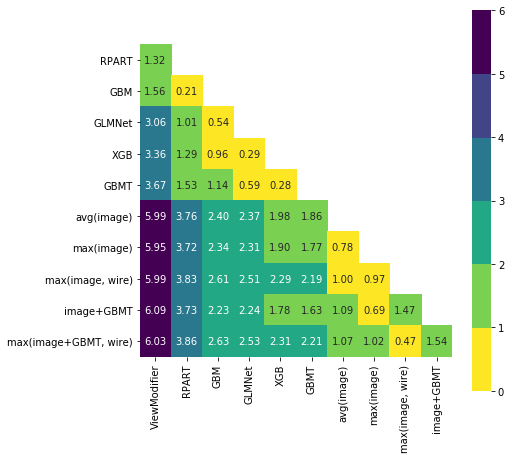

In [255]:
cmap = mpl.cm.get_cmap('viridis_r', 6)    # 11 discrete colors

fig, ax = plt.subplots(1, figsize=(7,7))
hmobj = sns.heatmap(df.loc[keep_rows, keep_cols].applymap(lambda x: -pd.np.log10(x)),
           cmap=cmap, vmin=0, vmax=6,
           cbar_kws={},
           square=True,
           annot=df.loc[keep_rows, keep_cols].applymap(lambda x: -pd.np.log10(x)), 
           fmt = '.2f',
                    ax=ax)
# ax.set_title("$-\\rm{log_{10}}$ p-value\nBonferroni-adjusted $\\alpha=0.05$ threshold = %.2f" % thr_bonferroni)
# ax.set_title("$-\\rm{log_{10}}$ p-value")

In [256]:
dfstr = df.applymap(lambda x: ('{n:5.{s}{c}} '.format(n=x, c='e' if x < 1e-3 else 'f',
                                                        s = 3- 2*(x < 1e-3)
                                                     ).replace('-0','-').replace('nan',''))
)

In [257]:
dfstr

,ViewModifier,RPART,GBM,GLMNet,XGB,GBMT,avg(image),max(image),max(wire),"max(image, wire)",image+GBMT,"max(image+GBMT, wire)"
RPART,0.048,,,,,,,,,,,
GBM,0.028,0.617,,,,,,,,,,
GLMNet,8.8e-4,0.099,0.287,,,,,,,,,
XGB,4.4e-4,0.052,0.109,0.513,,,,,,,,
GBMT,2.1e-4,0.030,0.073,0.260,0.519,,,,,,,
avg(image),1.0e-6,1.7e-4,0.004,0.004,0.010,0.014,,,,,,
max(image),1.1e-6,1.9e-4,0.005,0.005,0.013,0.017,0.168,,,,,
max(wire),,,,,,,,,,,,
"max(image, wire)",1.0e-6,1.5e-4,0.002,0.003,0.005,0.006,0.100,0.108,,,,
image+GBMT,8.1e-7,1.9e-4,0.006,0.006,0.016,0.023,0.081,0.202,,0.034,,


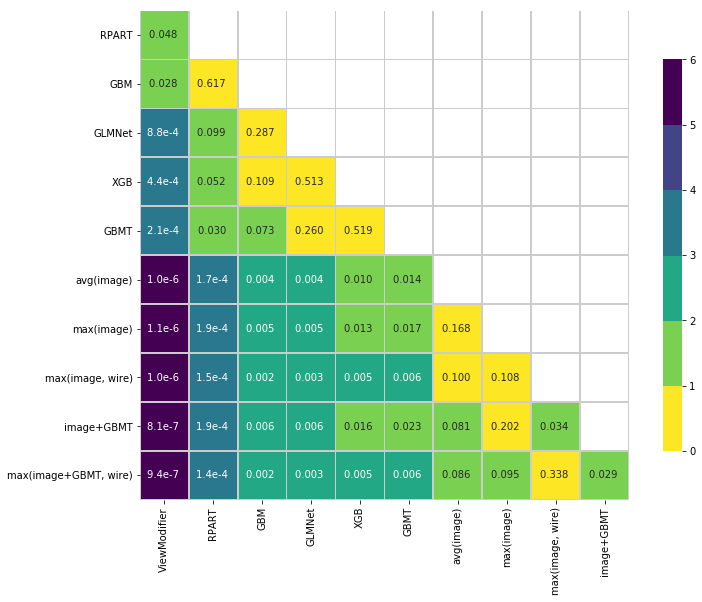

In [258]:
cmap = mpl.cm.get_cmap('viridis_r', 6)    # 11 discrete colors

fig, ax = plt.subplots(1, figsize=(12,9))
hmobj = sns.heatmap(df.loc[keep_rows, keep_cols].applymap(lambda x: -pd.np.log10(x)),
            cmap=cmap, vmin=0, vmax=6,
            cbar_kws={"shrink": 0.8},
            linewidths=0.8,
            linecolor=[0.8]*3,
            square=True,
            annot=dfstr.loc[keep_rows, keep_cols], 
            annot_kws = {'horizontalalignment':'center',},
            fmt = 's',
            ax=ax)
plt.yticks(rotation=0)
# plt.xticks(rotation=90)
pass
# ax.set_title("$-\\rm{log_{10}}$ p-value\nBonferroni-adjusted $\\alpha=0.05$ threshold = %.2f" % thr_bonferroni)
# ax.set_title("$-\\rm{log_{10}}$ p-value")

In [265]:
fn = "../tables/auroc_mcnemar_comparison-e5ce2d69b035975cb5336cec0da9a32a.csv"
df = pd.read_csv(fn, index_col=0)
# df.drop('score_wire', axis=0, inplace=True)
# df.drop('score_wire', axis=1, inplace=True)
# df.drop('wire', axis=0, inplace=True)
# df.drop('wire', axis=1, inplace=True)

pass

In [266]:
df = df.rename(columns=modelnamemap, index=modelnamemap)

df = df.loc[df.index.map(lambda x : 'avg(wire)' not in x).tolist(),
            df.columns.map(lambda x : 'avg(wire)' not in x).tolist()]

keep_rows = ~df.isnull().all(1)
keep_cols = ~df.isnull().all(0)
df.shape

(10, 11)

In [267]:
dfstr = df.applymap(lambda x: ('{n:5.{s}{c}} '.format(n=x, c='e' if x < 1e-3 else 'f',
                                                        s = 3- 2*(x < 1e-3)
                                                     ).replace('-0','-').replace('nan',''))
)
dfstr.shape

(10, 11)

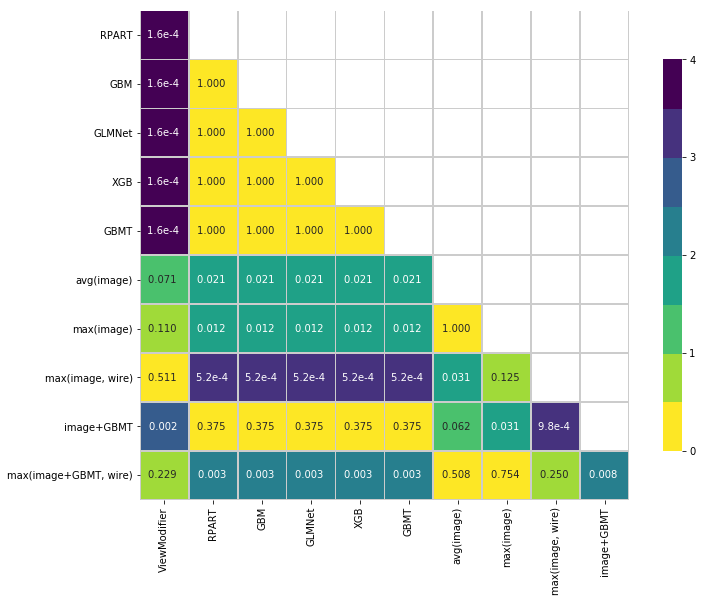

In [275]:
# df
cmap = mpl.cm.get_cmap('viridis_r', 8)    # 11 discrete colors

fig, ax = plt.subplots(1, figsize=(12,9))
hmobj = sns.heatmap(df.loc[keep_rows, keep_cols].applymap(lambda x: -pd.np.log10(x)),
            cmap=cmap, vmin=0, vmax=4,
            cbar_kws={"shrink": 0.8, "ticks":np.arange(0,4.01)},
            linewidths=0.8,
            linecolor=[0.8]*3,
            square=True,
            annot=dfstr.loc[keep_rows, keep_cols], 
            annot_kws = {'horizontalalignment':'center',},
            fmt = 's',
            ax=ax)
plt.yticks(rotation=0)
# plt.xticks(rotation=90)
pass
# ax.set_title("$-\\rm{log_{10}}$ p-value\nBonferroni-adjusted $\\alpha=0.05$ threshold = %.2f" % thr_bonferroni)
# ax.set_title("$-\\rm{log_{10}}$ p-value")